### This dataset contains information about people and there chances of having a heart stroke.

### Dataset Information:

### age - Age of the patient
### sex - Sex of the patient
### cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
### trtbps - Resting blood pressure (in mm Hg)
### chol - Cholestoral in mg/dl fetched via BMI sensor
### fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
### restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular ### hypertrophy
### thalachh - Maximum heart rate achieved
### oldpeak - Previous peak
### slp - Slope
### caa - Number of major vessels
### thall - Thalium Stress Test result ~ (0,3)
### exng - Exercise induced angina ~ 1 = Yes, 0 = No
### output - target : 0= less chance of heart attack 1= more chance of heart attack

Description

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (1=yes, 0=no)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)

In [3]:
heart=pd.read_csv(r"C:\Users\prama\Desktop\Afitech\Project files\heart.csv")

In [4]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
heart.shape

(303, 14)

In [7]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## EDA

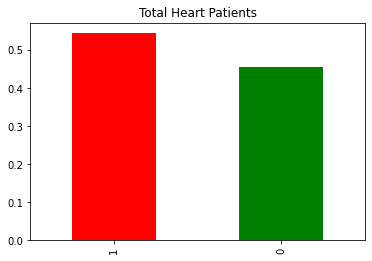

In [75]:
heart['output'].value_counts(normalize=True).plot(kind='bar',color=['red','green'],title='Total Heart Patients')
plt.show()

####   People  with more chances to get heart attack are more than the people  with less chances of heartattack

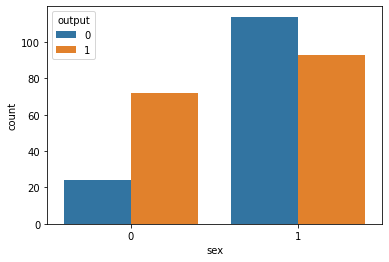

In [80]:
sns.countplot(data=heart,x='sex',hue='output')   # 0:Female,1:Male
plt.show()

#### Heart attack chances are more in male group

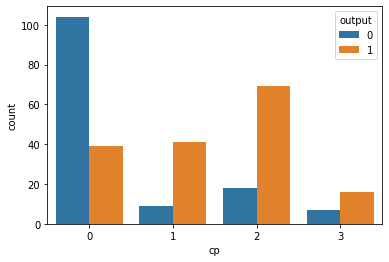

In [77]:
#cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
#output - target : 0= less chance of heart attack 1= more chance of heart attack
sns.countplot(data=heart,x='cp',hue='output')

####  People with chest type Non-anginal pain have more chances of heatattack

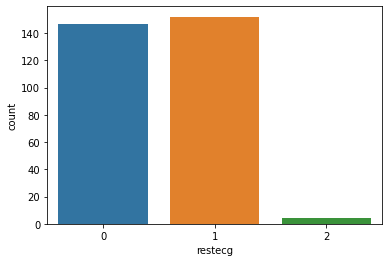

In [13]:
#restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
sns.countplot(data=heart,x='restecg')

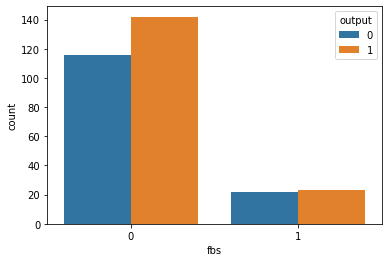

In [88]:
#fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
sns.countplot(data=heart,x='fbs',hue='output')

####  people with fasting blood sugar <=120 are having less chance of heart attack

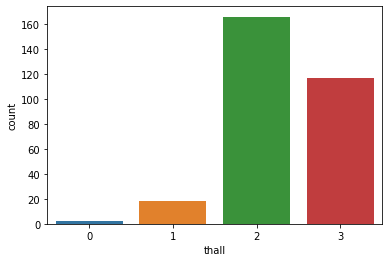

In [15]:
sns.countplot(data=heart,x='thall')

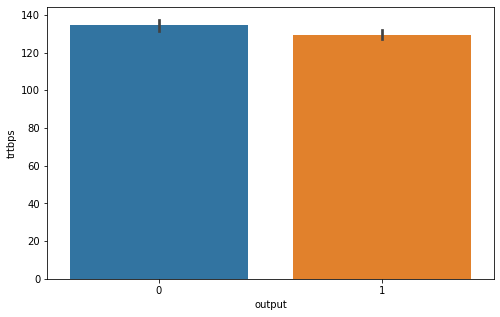

In [87]:
plt.figure(figsize=(8,5))
sns.barplot(data=heart,x='output',y='trtbps')

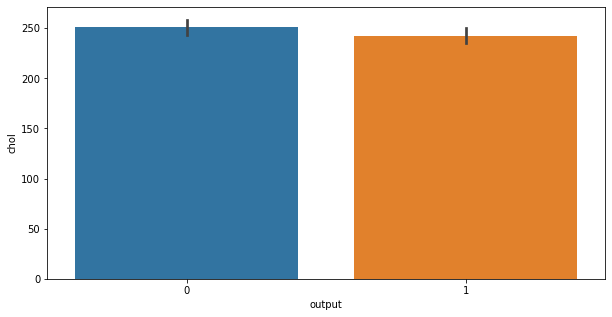

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(data=heart,x='output',y='chol')

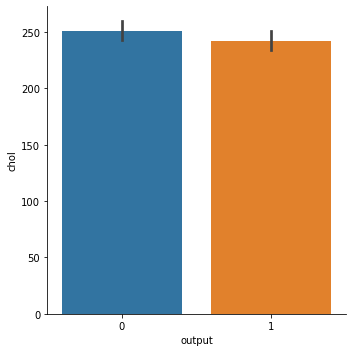

In [83]:
sns.factorplot(data=heart,x='output',y='chol',kind='bar')


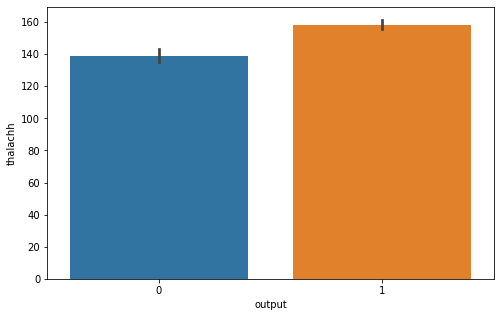

In [78]:
plt.figure(figsize=(8,5))
sns.barplot(data=heart,x='output',y='thalachh')

#### People with high heart rate have more chances of heart attack

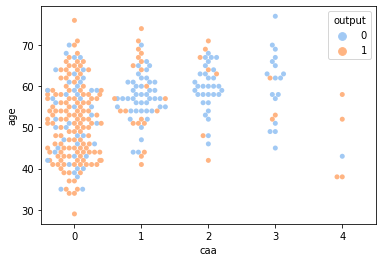

In [20]:
sns.swarmplot(x=heart['caa'],y=heart['age'],hue=heart['output'], palette='pastel')

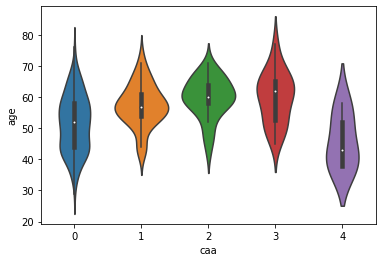

In [21]:
sns.violinplot(x='caa',y='age',data=heart)

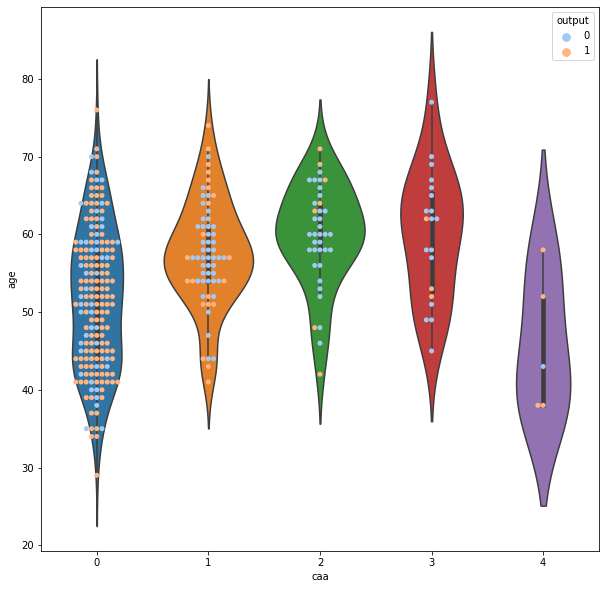

In [22]:
plt.figure(figsize = (10,10))
sns.violinplot(x='caa',y='age',data=heart)
sns.swarmplot(x=heart['caa'],y=heart['age'],hue=heart['output'], palette='pastel')

Observation:

This swarmplot gives us a lot of information.

Accoring to the figure, people belonging to caa category '0' , irrespective of their age are highly prone to getting a heart attack.

While there are very few people belonging to caa category '4' , but it seems that around 75% of those get heart attacks.

People belonging to category '1' , '2' and '3' are more or less at similar risk

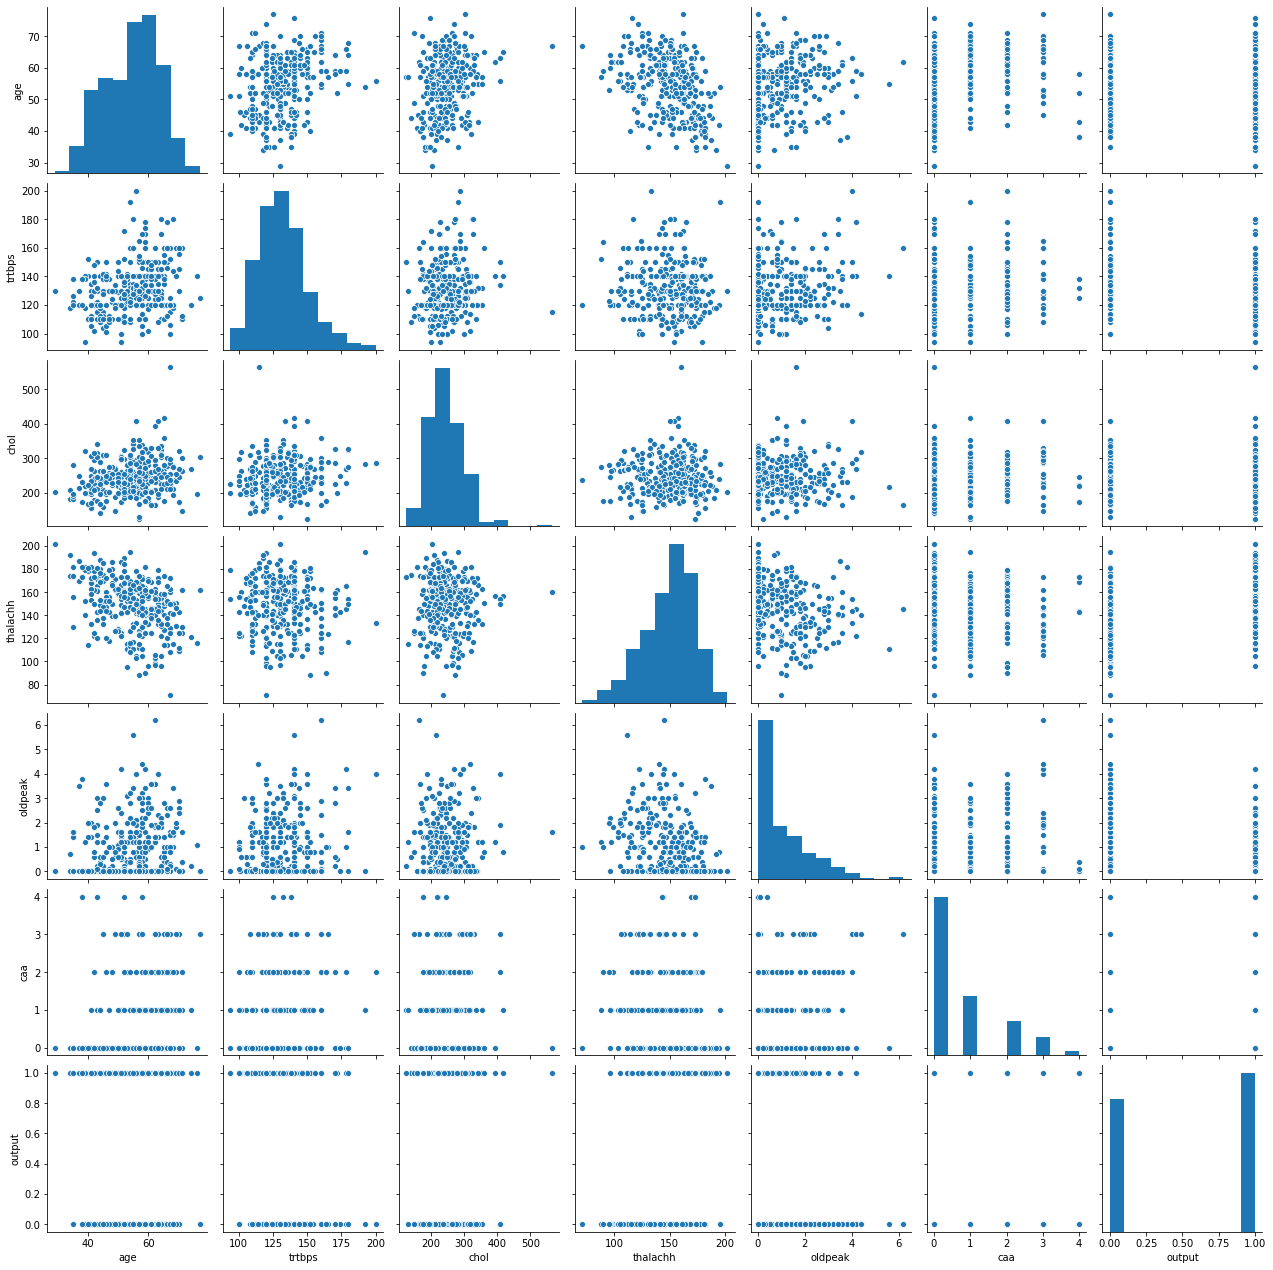

In [23]:
# PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES
cols=heart.drop(['sex','fbs','restecg','exng','slp','thall','cp'],axis=1)
sns.pairplot(data=cols)
plt.show()

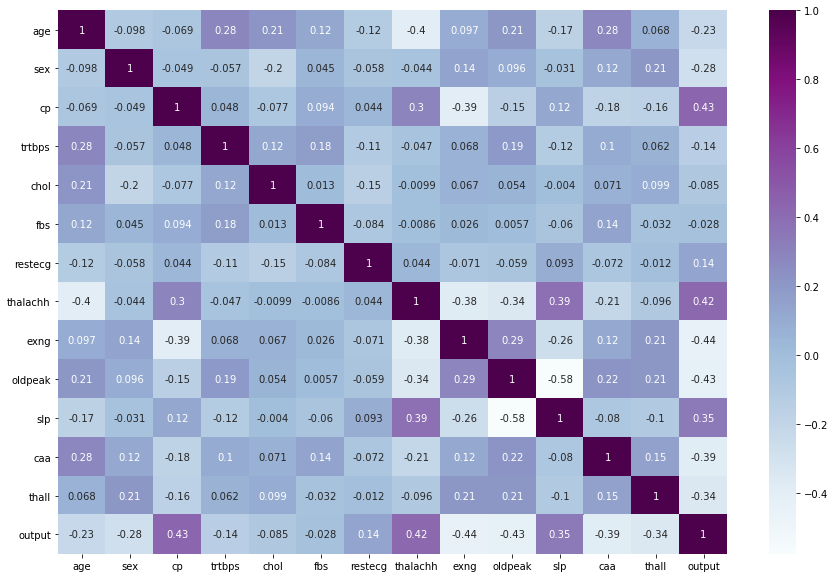

In [24]:
#Lets check correlation
plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(),annot=True,cmap='BuPu')

###  Splitting the Data into Training and Testing Sets

In [25]:
x=heart.drop(columns=['output'])
y=heart['output']

In [26]:
#Lets standardise our data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [28]:
LR = LogisticRegression()

LR.fit(x_train,y_train)

LogisticRegression()

In [29]:
#Predicting the x_test data
y_pred = LR.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [30]:
#Finding the accuracy of the outcome
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8421052631578947

In [31]:
#To check how accurate is our model using confusion matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[28,  7],
       [ 5, 36]], dtype=int64)

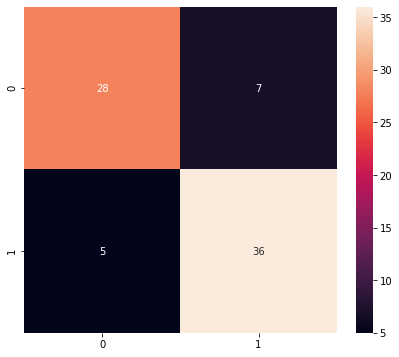

In [32]:
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix,annot=True,fmt='d')

In [33]:
true_positive = confusion_matrix[1][1]
false_positive = confusion_matrix[0][1]
false_negative = confusion_matrix[1][0]
true_negative = confusion_matrix[0][0]

In [34]:
#accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8421052631578947

In [35]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8372093023255814

In [36]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8780487804878049

In [37]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8571428571428572

In [38]:
#Lets find the roc curve of Logistic regression
fpr,tpr, thresholds = roc_curve(y_test, y_pred)

In [39]:
fpr

array([0. , 0.2, 1. ])

In [40]:
tpr

array([0.        , 0.87804878, 1.        ])

In [41]:
thresholds

array([2, 1, 0], dtype=int64)

In [42]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8390243902439024

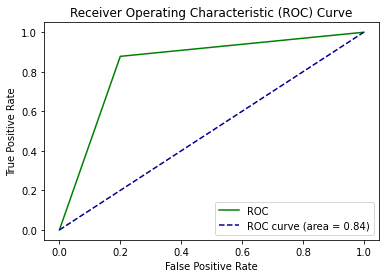

In [43]:
#Plotting the roc cuvrve 
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [44]:
#Applying knn model

In [45]:
#importing the KNN libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

In [46]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
#Predicting the x_test data
y_predict = knn.predict(x_test)
y_predict

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [48]:
# check the model confidence on training data
knn.score(x_train,y_train)

0.8590308370044053

In [49]:
accuracy1 = accuracy_score(y_test,y_predict)
accuracy1

0.8552631578947368

In [50]:
#lets try to increase the accuracy using hyperparameter tuning[Grid searchCV]
param_grid = {'algorithm': ['ball_tree', 'kd_tree', 'brute'] ,
                'leaf_size': [5,9,15,23,27,32,38],
                'n_neighbors':[2,4,8,12,14,17,19]
               
               }

In [51]:
Gridsearch = GridSearchCV(knn,param_grid,verbose =3)

In [52]:
Gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=2 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=2, score=0.609, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=2 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=2, score=0.761, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=2 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=2, score=0.622, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=2 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=2, score=0.667, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=2 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=2, score=0.844, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=4 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=4, score=0.826, total=   0.0s
[CV] algorithm=ball

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=19, score=0.783, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=19 ................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=19, score=0.891, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=19 ................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=19, score=0.822, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=19 ................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=19, score=0.689, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=19 ................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=19, score=0.889, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=2 .................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=2, score=0.609, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=2 .................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=2, score=0.761, total=   

[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=17, score=0.667, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=17 ...............
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=17, score=0.867, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=19 ...............
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=19, score=0.783, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=19 ...............
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=19, score=0.891, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=19 ...............
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=19, score=0.822, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=19 ...............
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=19, score=0.689, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=19 ...............
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=19, score=0.889, 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=19, score=0.822, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=19 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=19, score=0.689, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=19 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=19, score=0.889, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=2, score=0.609, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=2, score=0.761, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=2, score=0.622, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=2 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=2, score=0.667, tota

[CV]  algorithm=ball_tree, leaf_size=38, n_neighbors=19, score=0.889, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=2 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=2, score=0.609, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=2 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=2, score=0.761, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=2 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=2, score=0.622, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=2 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=2, score=0.667, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=2 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=2, score=0.844, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=4 ...................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=4, score=0.826, total=   0.0s
[CV] algor

[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=12, score=0.756, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_neighbors=12 ..................
[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=12, score=0.867, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_neighbors=14 ..................
[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=14, score=0.804, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_neighbors=14 ..................
[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=14, score=0.891, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_neighbors=14 ..................
[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=14, score=0.844, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_neighbors=14 ..................
[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=14, score=0.711, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=9, n_neighbors=14 ..................
[CV]  algorithm=kd_tree, leaf_size=9, n_neighbors=14, score=0.889, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=8, score=0.848, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=8, score=0.913, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=8, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=8, score=0.689, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=8, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=12, score=0.848, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=12, score=0.913, total=   0.0s
[CV] 

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=2, score=0.622, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=2, score=0.667, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=2, score=0.844, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=4 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=4, score=0.826, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=4 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=4, score=0.826, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=4 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=4, score=0.800, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=4 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=4, score=0.667, total=   0.0s
[CV] al

[CV]  algorithm=brute, leaf_size=5, n_neighbors=4, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=4 .....................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=4, score=0.667, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=4 .....................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=4, score=0.889, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=8 .....................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=8, score=0.848, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=8 .....................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=8, score=0.913, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=8 .....................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=8, score=0.800, total=   0.0s
[CV] algorithm=brute, leaf_size=5, n_neighbors=8 .....................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=8, score=0.689, total=   0.0s
[CV] algorithm=brute, leaf_s

[CV]  algorithm=brute, leaf_size=15, n_neighbors=2, score=0.761, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=2, score=0.622, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=2, score=0.667, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=2, score=0.844, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=4, score=0.826, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=4, score=0.826, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=15, n_neighbors=4, score=0.800, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=23, n_neighbors=19, score=0.689, total=   0.0s
[CV] algorithm=brute, leaf_size=23, n_neighbors=19 ...................
[CV]  algorithm=brute, leaf_size=23, n_neighbors=19, score=0.889, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=2, score=0.609, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=2, score=0.761, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=2, score=0.622, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=2, score=0.667, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=2, score=0.844, total=   0.0s
[CV] algorithm=brut

[CV]  algorithm=brute, leaf_size=38, n_neighbors=2, score=0.609, total=   0.0s
[CV] algorithm=brute, leaf_size=38, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=38, n_neighbors=2, score=0.761, total=   0.0s
[CV] algorithm=brute, leaf_size=38, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=38, n_neighbors=2, score=0.622, total=   0.0s
[CV] algorithm=brute, leaf_size=38, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=38, n_neighbors=2, score=0.667, total=   0.0s
[CV] algorithm=brute, leaf_size=38, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=38, n_neighbors=2, score=0.844, total=   0.0s
[CV] algorithm=brute, leaf_size=38, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=38, n_neighbors=4, score=0.826, total=   0.0s
[CV] algorithm=brute, leaf_size=38, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=38, n_neighbors=4, score=0.826, total=   0.0s
[CV] algorithm=brute,

[Parallel(n_jobs=1)]: Done 735 out of 735 | elapsed:    4.2s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 9, 15, 23, 27, 32, 38],
                         'n_neighbors': [2, 4, 8, 12, 14, 17, 19]},
             verbose=3)

In [53]:
#Getting the best parameters from above data.
Gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 12}

In [54]:
#Fitting the best parameters into the  KNN model
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 5, n_neighbors = 12)

In [55]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=12)

In [56]:
knn.score(x_train,y_train)

0.8546255506607929

In [57]:
#Checking the prediction using hyper parameter
y_predict  = knn.predict(x_test)
y_predict

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [58]:
accuracy2 = accuracy_score(y_test,y_predict)
accuracy2

0.868421052631579

In [59]:
#Great... when compared accuracy1 with accuracy2 , here our accuracy score increased.

In [60]:
#TO plot ROC,AUC curves for two models at a time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [61]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [62]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

In [64]:
LR.score(x_test,y_test)

0.8421052631578947

In [65]:
knn.score(x_test,y_test)

0.8552631578947368

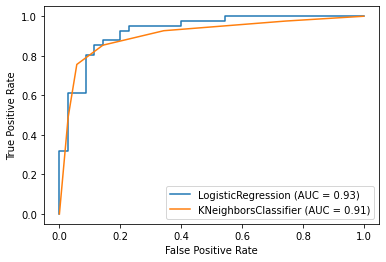

In [66]:
Curve = plot_roc_curve(LR,x_test,y_test)

plot_roc_curve(knn,x_test,y_test,ax=Curve.ax_)

In [89]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','Knn'],
    'Score' : [accuracy_score(y_test, y_pred)*100,accuracy_score(y_test, y_predict)*100]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Knn,86.842105
0,Logistic Regression,84.210526
